In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [ ]:
!unzip "/content/drive/MyDrive/Crime_Data_from_2010_to_2019.csv.zip"
!unzip "/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv(1).zip"

Archive:  /content/drive/MyDrive/Crime_Data_from_2010_to_2019.csv.zip
replace Crime_Data_from_2010_to_2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv(1).zip
replace Crime_Data_from_2020_to_Present.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
data1=pd.read_csv("/content/drive/MyDrive/Crime_Data_from_2010_to_2019.csv.zip")
data2=pd.read_csv("/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv")

In [ ]:
data1.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
data2.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
column_mapping = {
    'division_number': 'DR_NO',
    'date_reported': 'Date Rptd',
    'date_occurred': 'DATE OCC',
    'area': 'AREA ',
    'area_name': 'AREA NAME',
    'reporting_district': 'Rpt Dist No',
    'part': 'Part 1-2',
    'crime_code': 'Crm Cd',
    'crime_description': 'Crm Cd Desc',
    'modus_operandi': 'Mocodes',
    'victim_age': 'Vict Age',
    'victim_sex': 'Vict Sex',
    'victim_descent': 'Vict Descent',
    'premise_code': 'Premis Cd',
    'premise_description': 'Premis Desc',
    'weapon_code': 'Weapon Used Cd',
    'weapon_description': 'Weapon Desc',
    'status': 'Status',
    'status_description': 'Status Desc',
    'crime_code_1': 'Crm Cd 1',
    'crime_code_2': 'Crm Cd 2',
    'crime_code_3': 'Crm Cd 3',
    'crime_code_4': 'Crm Cd 4',
    'location': 'LOCATION',
    'cross_street': 'Cross Street',
    'latitude': 'LAT',
    'longitude': 'LON'
}

# Rename columns in data2 to match data1
data2.rename(columns=column_mapping, inplace=True)

# Concatenate the datasets
data = pd.concat([data1, data2], ignore_index=True)
pd.set_option("display.max_columns",None)
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350.0,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45.0,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515.0,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150.0,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100.0,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970534,231606525,2023-03-22,2023-03-22 10:00:00,NaN,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
2970535,231210064,2023-04-12,2023-04-12 16:30:00,NaN,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
2970536,230115220,2023-07-02,2023-07-01 00:01:00,NaN,1,Central,154,1,352,PICKPOCKET,1822 0344,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
2970537,230906458,2023-03-05,2023-03-05 09:00:00,NaN,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


<ipython-input-14-26c8a38108e7>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])


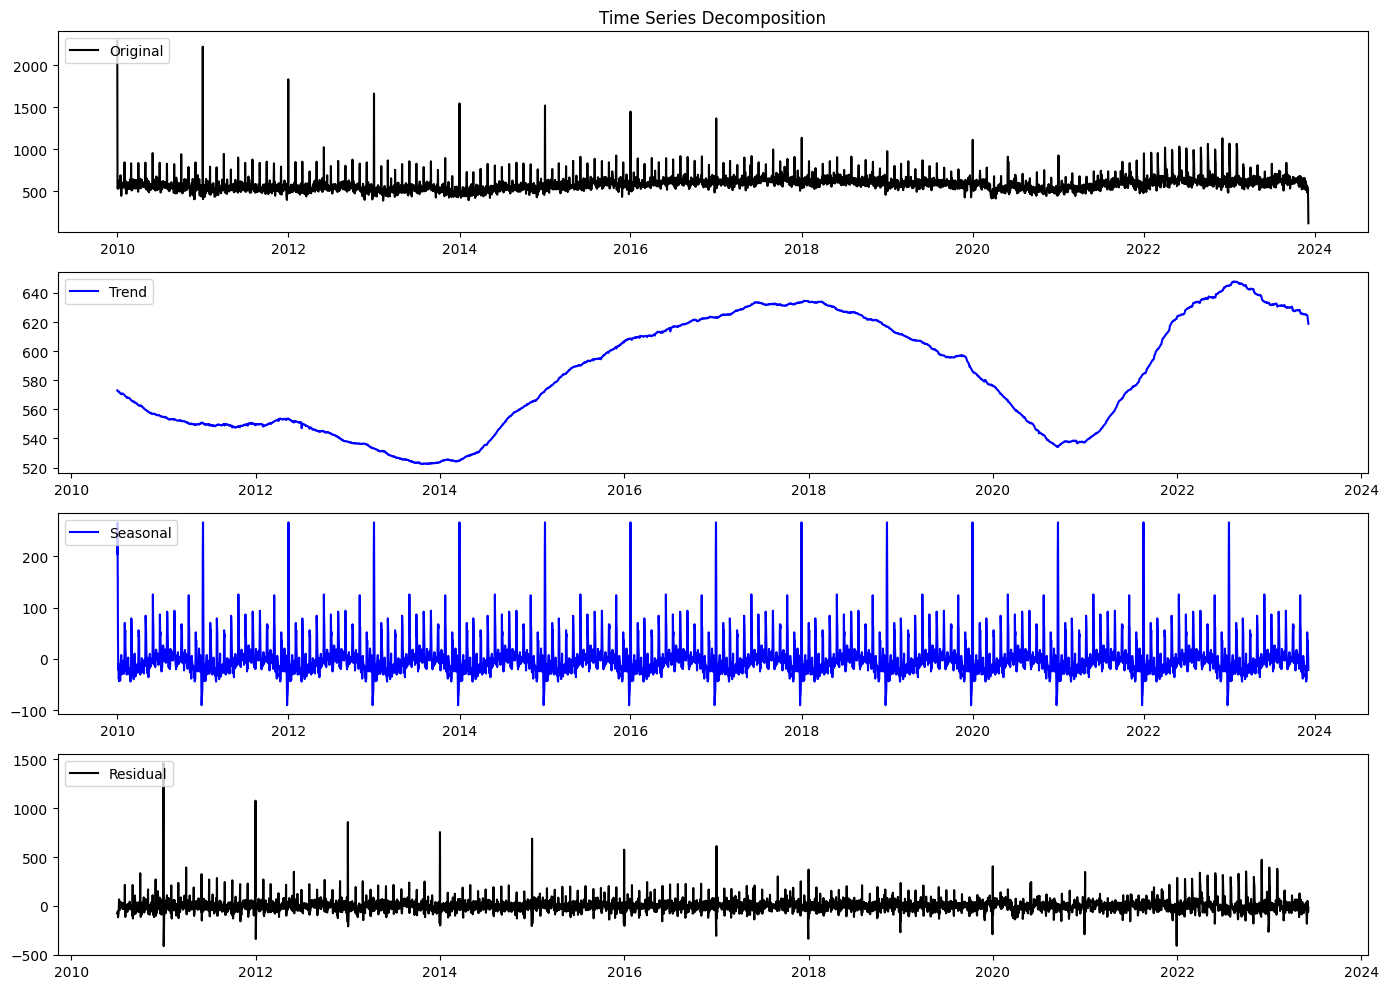

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# Convert 'Date Rptd' to datetime and set it as index
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
data.set_index('DATE OCC', inplace=True)

# Ensure the data is sorted by date
data = data.sort_index()

# Aggregate data by day or other appropriate frequency
# Here we assume you want to count the number of reports per day
time_series = data.resample('D').size()  # 'D' for daily frequency, adjust as needed

# Decompose the time series
decomposition = seasonal_decompose(time_series, model='additive', period=365)  # Adjust period if needed

# Plot the decomposition
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original', color='black')
plt.legend(loc='upper left')
plt.title('Time Series Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='black')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
data.shape

(2970539, 28)

In [ ]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
data.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC          float64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970539 entries, 0 to 2970538
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        float64
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(9

In [ ]:
data.duplicated().unique().sum()

0

In [ ]:
data.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC           852950
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            346462
Vict Age                0
Vict Sex           309337
Vict Descent       309391
Premis Cd              63
Premis Desc           705
Weapon Used Cd    1962410
Weapon Desc       1962411
Status                  3
Status Desc             0
Crm Cd 1               21
Crm Cd 2          2768071
Crm Cd 3          2964905
Crm Cd 4          2970373
LOCATION                0
Cross Street      2479382
LAT                     0
LON                     0
dtype: int64

In [ ]:
data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.970539e+06,2.117589e+06,2.970539e+06,2.970539e+06,2.970539e+06,2.970539e+06,2.970539e+06,2.970476e+06,1.008129e+06,2.970518e+06,202468.000000,5634.000000,166.000000,2.970539e+06,2.970539e+06
mean,1.677138e+08,1.359589e+03,1.097798e+01,1.144197e+03,1.436626e+00,5.054556e+02,3.118000e+01,3.098644e+02,3.690015e+02,5.052549e+02,952.083164,976.536919,981.036145,3.404056e+01,-1.182314e+02
std,3.996739e+07,6.471361e+02,6.039260e+00,6.039354e+02,4.959676e-01,2.098473e+02,2.100466e+01,2.130294e+02,1.165910e+02,2.096886e+02,121.435176,75.084421,66.799101,1.118486e+00,3.865794e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-1.100000e+01,1.010000e+02,1.010000e+02,1.100000e+02,210.000000,93.000000,421.000000,0.000000e+00,-1.188279e+02
25%,1.316156e+08,9.300000e+02,6.000000e+00,6.370000e+02,1.000000e+00,3.300000e+02,1.900000e+01,1.020000e+02,4.000000e+02,3.300000e+02,998.000000,998.000000,998.000000,3.401090e+01,-1.184345e+02
50%,1.706126e+08,1.430000e+03,1.100000e+01,1.172000e+03,1.000000e+00,4.420000e+02,3.100000e+01,2.100000e+02,4.000000e+02,4.420000e+02,998.000000,998.000000,998.000000,3.406130e+01,-1.183272e+02
75%,2.013103e+08,1.900000e+03,1.600000e+01,1.656000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,4.000000e+02,6.260000e+02,998.000000,998.000000,998.000000,3.417210e+01,-1.182763e+02
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,5.160000e+02,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,0.000000e+00


In [ ]:
data.fillna(0,inplace=True)
data.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [ ]:
data["Crm Cd Desc"].nunique()

147

In [ ]:
d=pd.DataFrame(data[["Crm Cd Desc","Part 1-2"]].value_counts())
pd.set_option("display.max_rows",None)
d

,,count
Crm Cd Desc,Part 1-2,
BATTERY - SIMPLE ASSAULT,2,258516
VEHICLE - STOLEN,1,251365
BURGLARY FROM VEHICLE,1,214791
BURGLARY,1,199666
THEFT PLAIN - PETTY ($950 & UNDER),1,193267
THEFT OF IDENTITY,2,181550
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",2,161277
INTIMATE PARTNER - SIMPLE ASSAULT,2,157300
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1,141596


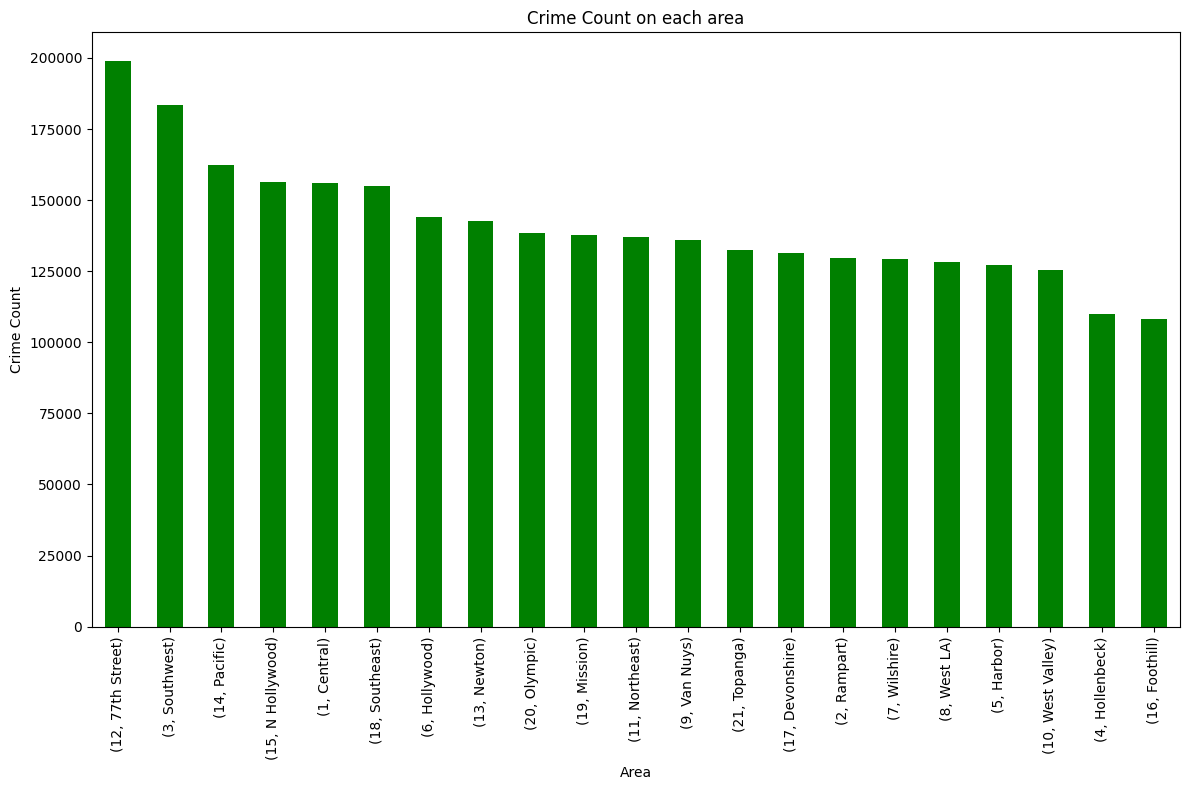

In [ ]:
import matplotlib.pyplot as plt

#calculating crime count
area_crime_count=data[["AREA","AREA NAME"]].value_counts()

#Plotting
plt.figure(figsize=(12,8))
area_crime_count.plot(kind="bar",color="green")
plt.xlabel("Area")
plt.ylabel("Crime Count")
plt.title("Crime Count on each area")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
data["Date Rptd"]=pd.to_datetime(data["Date Rptd"])
data["DATE OCC"]=pd.to_datetime(data["DATE OCC"])
# Creating a column for Year and Month
data['year'] = data['DATE OCC'].dt.year
data['month'] = data['DATE OCC'].dt.month

# Creating a pivot table for monthly crime counts
monthly_crime_counts = data.groupby(['year', 'month']).size().reset_index(name='crime_count')
pivot_table = monthly_crime_counts.pivot(index='month', columns='year', values='crime_count')

# Creating yearly crime counts
yearly_crime_counts = data['year'].value_counts().sort_index()
pivot_table

<ipython-input-37-345ff11e76d2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date Rptd"]=pd.to_datetime(data["Date Rptd"])
<ipython-input-37-345ff11e76d2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["DATE OCC"]=pd.to_datetime(data["DATE OCC"])


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
month,,,,,,,,,,,,,,
1,19457,18078,17856,16742,16165,18347,19038,19620,19358,18381,18496,16552,18448,19633
2,16020,14678,15342,14058,13684,16005,17348,17103,17130,16233,17255,15411,17700,18313
3,18128,16940,16586,16212,15608,18005,18266,19400,19017,18782,16165,16320,19687,19024
4,17770,16435,16299,15718,15429,16940,18620,18748,19127,17903,15683,16057,19784,18775
5,17716,16937,17489,16594,16713,17930,19051,19445,19933,18618,17204,16989,20418,18738
6,17668,17012,17046,16097,16367,17543,18968,19029,19247,18296,17034,17156,20201,18500
7,17849,17270,16970,16629,17237,18679,19409,20148,19818,19043,17121,18659,19952,19697
8,17293,17000,17644,17420,17054,18989,19457,19702,19709,18886,16874,18374,20081,19743
9,16625,16237,16976,16220,16758,18271,18479,19414,18434,17964,15639,18362,19279,18861


In [ ]:
monthly_crime_counts

,year,month,crime_count
0,2010,1,19457
1,2010,2,16020
2,2010,3,18128
3,2010,4,17770
4,2010,5,17716
5,2010,6,17668
6,2010,7,17849
7,2010,8,17293
8,2010,9,16625
9,2010,10,17612


In [ ]:
yearly_crime_counts

year
2010    209175
2011    200705
2012    201500
2013    192596
2014    195471
2015    215469
2016    225410
2017    231020
2018    228824
2019    217419
2020    199482
2021    209451
2022    234436
2023    209581
Name: count, dtype: int64

In [ ]:
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Monthly Crime Frequency by Year", "Yearly Crime Distribution"))

# Plotting Monthly Crime Frequency by Year
for year in pivot_table.columns:
    fig.add_trace(go.Scatter(x=pivot_table.index, y=pivot_table[year],  name=str(year)), row=1, col=1)

# Plotting Yearly Crime Distribution
fig.add_trace(go.Bar(x=yearly_crime_counts.index, y=yearly_crime_counts.values, marker_color='green',name="counts"), row=1, col=2)

# Updating layout for the plots
fig.update_layout(height=600, width=1200, template='seaborn', showlegend=True)
fig.update_xaxes(title_text='Month', row=1, col=1, tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_xaxes(title_text='Year', row=1, col=2)
fig.update_yaxes(title_text='Number of Crimes', row=1, col=1)
fig.update_yaxes(title_text='Number of Crimes', row=1, col=2)

# Display the plot
fig.show()

In [ ]:
# Create a boolean mask for June 2021
mask = (data['DATE OCC'] >= '2023-12-01')

# Drop the rows where the mask is True
data = data[~mask]



In [ ]:
data["Date Rptd"]=pd.to_datetime(data["Date Rptd"])
data["DATE OCC"]=pd.to_datetime(data["DATE OCC"])
# Creating a column for Year and Month
data['year'] = data['DATE OCC'].dt.year
data['month'] = data['DATE OCC'].dt.month
data['day'] = data['DATE OCC'].dt.day

# Creating a pivot table for monthly crime counts
monthly_crime_counts = data.groupby(['year', 'month']).size().reset_index(name='crime_count')
pivot_table = monthly_crime_counts.pivot(index='month', columns='year', values='crime_count')

# Creating yearly crime counts
yearly_crime_counts = data['year'].value_counts().sort_index()
pivot_table

<ipython-input-42-dcbe91da1be6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-dcbe91da1be6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-dcbe91da1be6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-dcbe91d

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
month,,,,,,,,,,,,,,
1,19457.0,18078.0,17856.0,16742.0,16165.0,18347.0,19038.0,19620.0,19358.0,18381.0,18496.0,16552.0,18448.0,19633.0
2,16020.0,14678.0,15342.0,14058.0,13684.0,16005.0,17348.0,17103.0,17130.0,16233.0,17255.0,15411.0,17700.0,18313.0
3,18128.0,16940.0,16586.0,16212.0,15608.0,18005.0,18266.0,19400.0,19017.0,18782.0,16165.0,16320.0,19687.0,19024.0
4,17770.0,16435.0,16299.0,15718.0,15429.0,16940.0,18620.0,18748.0,19127.0,17903.0,15683.0,16057.0,19784.0,18775.0
5,17716.0,16937.0,17489.0,16594.0,16713.0,17930.0,19051.0,19445.0,19933.0,18618.0,17204.0,16989.0,20418.0,18738.0
6,17668.0,17012.0,17046.0,16097.0,16367.0,17543.0,18968.0,19029.0,19247.0,18296.0,17034.0,17156.0,20201.0,18500.0
7,17849.0,17270.0,16970.0,16629.0,17237.0,18679.0,19409.0,20148.0,19818.0,19043.0,17121.0,18659.0,19952.0,19697.0
8,17293.0,17000.0,17644.0,17420.0,17054.0,18989.0,19457.0,19702.0,19709.0,18886.0,16874.0,18374.0,20081.0,19743.0
9,16625.0,16237.0,16976.0,16220.0,16758.0,18271.0,18479.0,19414.0,18434.0,17964.0,15639.0,18362.0,19279.0,18861.0


In [ ]:
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Monthly Crime Frequency by Year", "Yearly Crime Distribution"))

# Plotting Monthly Crime Frequency by Year
for year in pivot_table.columns:
    fig.add_trace(go.Scatter(x=pivot_table.index, y=pivot_table[year],  name=str(year)), row=1, col=1)

# Plotting Yearly Crime Distribution
fig.add_trace(go.Bar(x=yearly_crime_counts.index, y=yearly_crime_counts.values, marker_color='green',name="counts"), row=1, col=2)

# Updating layout for the plots
fig.update_layout(height=600, width=1200, template='seaborn', showlegend=True)
fig.update_xaxes(title_text='Month', row=1, col=1, tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_xaxes(title_text='Year', row=1, col=2)
fig.update_yaxes(title_text='Number of Crimes', row=1, col=1)
fig.update_yaxes(title_text='Number of Crimes', row=1, col=2)

# Display the plot
fig.show()

In [ ]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
data[['Crm Cd Desc',"Part 1-2"]].value_counts()

Crm Cd Desc                                               Part 1-2
BATTERY - SIMPLE ASSAULT                                  2           258368
VEHICLE - STOLEN                                          1           251170
BURGLARY FROM VEHICLE                                     1           214687
BURGLARY                                                  1           199558
THEFT PLAIN - PETTY ($950 & UNDER)                        1           193204
THEFT OF IDENTITY                                         2           181467
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)   2           161196
INTIMATE PARTNER - SIMPLE ASSAULT                         2           157233
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT            1           141504
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)           1           121324
ROBBERY                                                   1           112993
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                  2           112992
THEFT-GRA

In [ ]:
top_20_crime_counts=data[['Crm Cd Desc',"Part 1-2"]].value_counts().head(20)
top_20_crime_counts

Crm Cd Desc                                               Part 1-2
BATTERY - SIMPLE ASSAULT                                  2           258368
VEHICLE - STOLEN                                          1           251170
BURGLARY FROM VEHICLE                                     1           214687
BURGLARY                                                  1           199558
THEFT PLAIN - PETTY ($950 & UNDER)                        1           193204
THEFT OF IDENTITY                                         2           181467
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)   2           161196
INTIMATE PARTNER - SIMPLE ASSAULT                         2           157233
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT            1           141504
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)           1           121324
ROBBERY                                                   1           112993
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                  2           112992
THEFT-GRA

In [ ]:
import os
# Count occurrences of each crime
crime_counts = data['Crm Cd Desc'].value_counts()

# Get the top 20 crimes
top_20_crime_desc = crime_counts.head(20).index

# Separate the top 20 crimes from the rest
top_20_data = data[data['Crm Cd Desc'].isin(top_20_crime_desc)]
remaining_data = data[~data['Crm Cd Desc'].isin(top_20_crime_desc)]


# Define the folder path
folder_path = '/content/drive/MyDrive/crime 10'

# Create the folder if it does not exist
os.makedirs(folder_path, exist_ok=True)

# Save each of the top 20 crimes to individual files
for crime in top_20_crime_desc:
    crime_data = top_20_data[top_20_data['Crm Cd Desc'] == crime]
    # Replace characters that are not allowed in filenames
    filename = f'{crime.replace("/", "_").replace(" ", "_")}.csv'
    file_path = os.path.join(folder_path, filename)
    crime_data.to_csv(file_path, index=False)

# Save the remaining crimes to one file
remaining_data.to_csv(os.path.join(folder_path, 'remaining_crimes.csv'), index=False)